<a href="https://colab.research.google.com/github/lcnature/PSY291/blob/main/PSY291_Ch14_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

## Example 1: global warming

Today we will look into an approach related to correlation, that allows to not only analyze the relationship between two variables but also predict one by the other: **regression**.

Let's continue looking at data related to global warming.

This time, we look at how the annual average global temperature change over the 140 years.




In [27]:
import pandas as pd
url = 'https://raw.githubusercontent.com/lcnature/PSY291/main/sample_data/temp_year.txt'


data = pd.read_csv(url, skiprows=1, sep='     ',
                   index_col=False, names=['Year', 'relative_temperature', 'relative_temperature_smoothed'])
# the data file was not saved with perfect spacing between
# column names so we have to make some extra specification to
# load it correctly. But you can safely ignore this detail.

print(data)

<ipython-input-27-464d50dc6a5d>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv(url, skiprows=1, sep='     ',


     Year  relative_temperature  relative_temperature_smoothed
0    1880                 -0.17                          -0.10
1    1881                 -0.09                          -0.13
2    1882                 -0.11                          -0.17
3    1883                 -0.17                          -0.20
4    1884                 -0.28                          -0.24
..    ...                   ...                            ...
139  2019                  0.98                           0.93
140  2020                  1.01                           0.95
141  2021                  0.85                           0.97
142  2022                  0.89                           0.99
143  2023                  1.17                           1.01

[144 rows x 3 columns]


The data are obtained from [here](https://climate.nasa.gov/vital-signs/global-temperature/?intent=121)

Data source: NASA's Goddard Institute for Space Studies (GISS)

Skipping the first column which purely includes indices, there are three useful columns: *Year*, raw-data of average global temperature relative to a baseline (*No_smoothing*), and a temporally smoothed version of it (*Lowess(5)*). We can ignore the last one and focus on the raw data: *No_smoothing*.

Here is how the temperature looks like since 1880:

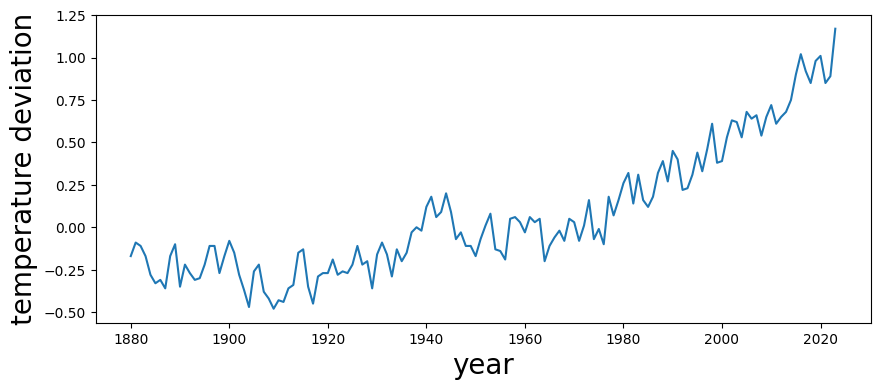

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,4])

plt.plot(data['Year'], data['relative_temperature'])
plt.xlabel('year', fontsize=20)
plt.ylabel('temperature deviation', fontsize=20)
plt.show()


The temperature roughly follows a linear increasing trend from about 1900. For simplicity, we analyze all data together.

## A linear model of data

We hope to model the temperature deviation ($Y$) as a straight line described by a linear function of the year ($X$):

$$Y = \beta X + b + ϵ$$

$\beta$ is a coefficie that describe how much $Y$ increase (or decrease) per unit change of $X$. It is also called **slope** of our linear equation.

In this case, it means how many $^\circ C$ increase ($^\circ C$ of increase is the same as $1.8 ^\circ F$ increase) happens on average each year.

$b$ is a baseline, or **intercept**, which means if we extend the line to the year of 0 AD, what temperature is expected. Of course we know that the temperature is quite stable before industrial revolution, so this number does not reflect the true temperature at year 0.

Lastly, $\epsilon$ is used to express any difference between the actual $Y$ value and what can be predicted by $X$ and the coefficients we are about to estimate. Usually we call it **residual**.

The process of estimating the parameters $\beta$ and $b$ is **linear regression**. The word "linear" reflects the fact that our model is a linear function.




In [39]:
from scipy.stats import linregress

result = linregress(data['Year'], data['relative_temperature'])

print(result)
print()

print('The best-fitting line: Y = {:.03f} * X {:+.02f}\n'.format(result.slope, result.intercept))

print('r2: {}\n'.format(result.rvalue**2))

print('p-value for the slope:', result.pvalue)

# The complex strings in the print() function is not our focus.
# They are used to control the format of the text being printed.
# If you are interested, here is a gental introduction:
# https://www.w3schools.com/python/ref_string_format.asp

LinregressResult(slope=0.007915862872759425, intercept=-15.379681396190017, rvalue=0.8736267451524963, pvalue=2.889284271155346e-46, stderr=0.00036999622514950243, intercept_stderr=0.722211417684274)

The best-fitting line: Y = 0.008 * X -15.38

r2: 0.7632236898457446

p-value for the slope: 2.889284271155346e-46


This indicates that in the last 140 years, the temperature increases by $0.008^\circ C$ / year.

Here, $r^2$ has the same meaning as before: ratio of the total variation in the data $Y$ that can be explained by our linear equation.



## Examining curve fitting

We can plot the fitted curve against the actual data points.


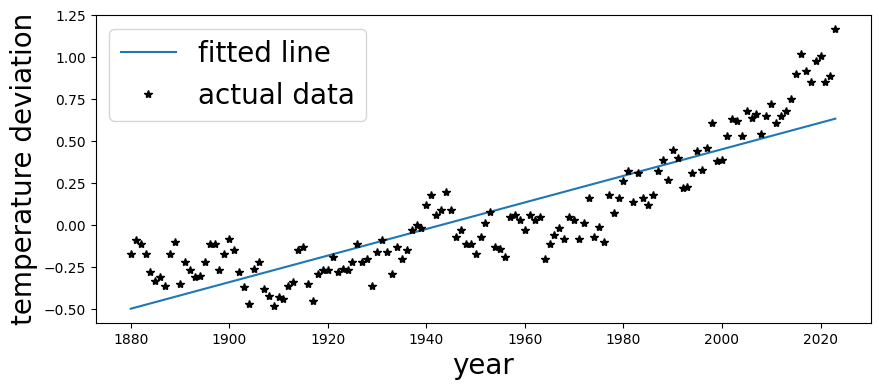

In [42]:
import matplotlib.pyplot as plt

# Y predicted by the curve
pred_Y = data['Year'] * result.slope + result.intercept

plt.figure(figsize=[10,4])
plt.plot(data['Year'], pred_Y, label='fitted line')
plt.plot(data['Year'], data['relative_temperature'], 'k*', label='actual data')
plt.legend(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('temperature deviation', fontsize=20)
plt.show()


It is not perfect. This is because the temperature did not increase much before 1900, and that the increase accelerated slightly in the last ten years.

We can quantify the error of fit by the root-mean-squared-error (**RMSE**):

$RMSE = \sqrt{\frac {\sum (Y-Y_{pred})^2 } {n-2 } }$

In [45]:
import numpy as np

rmse = np.sqrt(np.sum(np.square(data['relative_temperature'] - pred_Y)) / (len(data['Year']) - 2))

print('RMSE: ', rmse)

RMSE:  0.184561000626901


## Linear regression as optimization

We can think of linear regression, or model fitting in general, as a process of optimization:

We define a loss function which quantifies how bad our model fits the data.

This loss function can be sum of squared residuals in the case of linear regression.

$SS = \sum (Y - \beta X - b) ^ 2$

On the surface, $SS$ depends on four variables: $X$, $Y$, $\beta$, $b$. But because $X$ and $Y$ are given before we analyze the data that we cannot change, essentially $SS$ is only a function of two parameters: $\beta$ and $b$.

The process of estimating $\beta$ and $b$ is to find the values of $\beta$ and $b$ that jointly make $SS$ the lowest (minimizing loss function).

We can try a few different values of $\beta$ and $b$ to see how $SS$ changes:

SS with the parameters estimated by linear regresion:  4.83691233924122


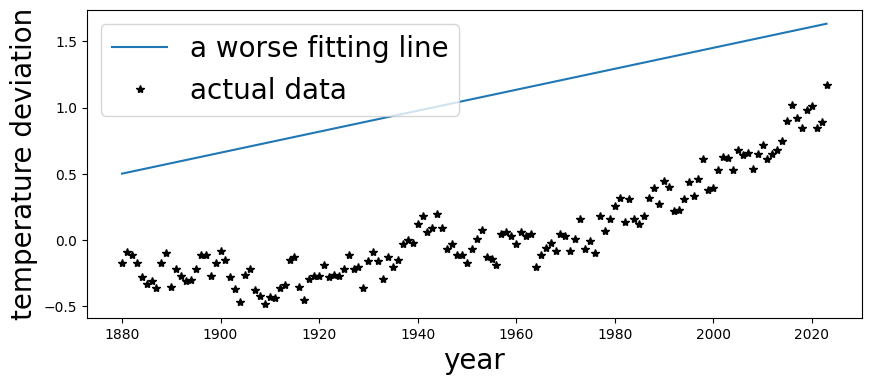

SS with a different intercept:  148.8369123392412


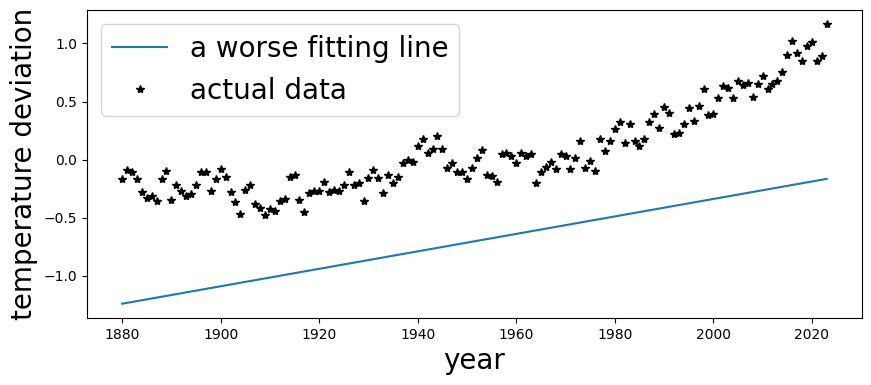

SS with a different slope:  90.78439062626916


In [83]:
# first we calculate the SS for the best fit parameters (outcome of linear regression)

SS = np.sum(np.square(data['relative_temperature'] - pred_Y))
print('SS with the parameters estimated by linear regresion: ', SS)

# now let's move up the intercept

b_bad = result.intercept + 1
pred_Y_bad1 = data['Year'] * result.slope + b_bad

plt.figure(figsize=[10,4])
plt.plot(data['Year'], pred_Y_bad1, label='a worse fitting line')
plt.plot(data['Year'], data['relative_temperature'], 'k*', label='actual data')
plt.legend(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('temperature deviation', fontsize=20)
plt.show()

SS_bad1 = np.sum(np.square(data['relative_temperature'] - pred_Y_bad1))
print('SS with a different intercept: ', SS_bad1)


# Now let's see what happens if we change the slope

beta_bad = result.slope * 0.95
pred_Y_bad2 = data['Year'] * beta_bad + result.intercept

plt.figure(figsize=[10,4])
plt.plot(data['Year'], pred_Y_bad2, label='a worse fitting line')
plt.plot(data['Year'], data['relative_temperature'], 'k*', label='actual data')
plt.legend(fontsize=20)
plt.xlabel('year', fontsize=20)
plt.ylabel('temperature deviation', fontsize=20)
plt.show()

SS_bad2 = np.sum(np.square(data['relative_temperature'] - pred_Y_bad2))
print('SS with a different slope: ', SS_bad2)